# YF 101 - Basic Usage

This notebook is set up to demonstrate the basic usage of Yahoo Financicals API

In [1]:
# import a bunch of libraries
import sys
import datetime
from yahoofinancials import YahooFinancials

In [2]:
# Single Stock Historical Price
# define yf object, let's start with BABA
yf_stock_single = YahooFinancials('BABA')

In [3]:
# query historical price from '2015-01-15' to '2018-09-10', return json
single_stock_prices = yf_stock_single.get_historical_price_data('2015-01-15', '2017-10-15', 'weekly')

In [4]:
single_stock_prices
# Some information in the dictionary results may become interesting in future
# 'firstTradeDate': {'formatted_date': '2014-09-19', 'date': 1411113600},
# 'instrumentType': 'EQUITY',

{'BABA': {'eventsData': {},
  'firstTradeDate': {'formatted_date': '2014-09-19', 'date': 1411113600},
  'currency': 'USD',
  'instrumentType': 'EQUITY',
  'timeZone': {'gmtOffset': -14400},
  'prices': [{'date': 1421038800,
    'high': 100.18000030517578,
    'low': 95.5199966430664,
    'open': 99.27999877929688,
    'close': 96.88999938964844,
    'volume': 49396000,
    'adjclose': 96.88999938964844,
    'formatted_date': '2015-01-12'},
   {'date': 1421643600,
    'high': 105.19999694824219,
    'low': 97.58999633789062,
    'open': 98.30000305175781,
    'close': 103.11000061035156,
    'volume': 48492900,
    'adjclose': 103.11000061035156,
    'formatted_date': '2015-01-19'},
   {'date': 1422248400,
    'high': 105.12999725341797,
    'low': 87.36000061035156,
    'open': 104.4000015258789,
    'close': 89.08000183105469,
    'volume': 181837800,
    'adjclose': 89.08000183105469,
    'formatted_date': '2015-01-26'},
   {'date': 1422853200,
    'high': 91.87999725341797,
    'low

In [5]:
# I don't like json, let's convert to pd
# import more libraries
import json
from pandas.io.json import json_normalize
import pandas as pd


In [6]:
# Convert prices to data frame
df = pd.DataFrame.from_dict(single_stock_prices["BABA"]["prices"])

Now some really nice data visualization. Okay, not really

In [8]:
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [9]:
# Set index before plot
df = df.set_index(df.formatted_date)

In [11]:
df

,adjclose,close,date,formatted_date,high,low,open,volume
formatted_date,,,,,,,,
2015-01-12,96.889999,96.889999,1421038800,2015-01-12,100.180000,95.519997,99.279999,49396000
2015-01-19,103.110001,103.110001,1421643600,2015-01-19,105.199997,97.589996,98.300003,48492900
2015-01-26,89.080002,89.080002,1422248400,2015-01-26,105.129997,87.360001,104.400002,181837800
2015-02-02,85.680000,85.680000,1422853200,2015-02-02,91.879997,85.419998,91.129997,93470600
2015-02-09,89.050003,89.050003,1423458000,2015-02-09,89.300003,85.470001,85.830002,66387700
2015-02-16,86.639999,86.639999,1424062800,2015-02-16,88.989998,86.379997,88.779999,37971100
2015-02-23,85.120003,85.120003,1424667600,2015-02-23,87.160004,83.879997,86.510002,55960400
2015-03-02,84.400002,84.400002,1425272400,2015-03-02,86.269997,80.029999,85.000000,116086900
2015-03-09,81.860001,81.860001,1425873600,2015-03-09,84.349998,80.650002,84.349998,68037200


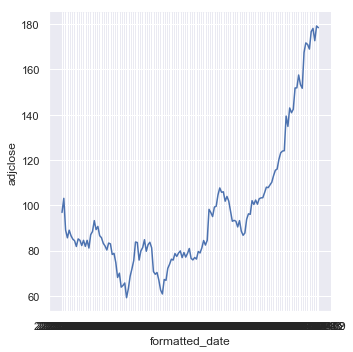

In [18]:
sns.relplot(x="formatted_date", y="adjclose",kind="line",ci="sd", data=df)